<a href="https://colab.research.google.com/github/1lwlawck/image-colorizer-cnn-method/blob/main/Image_Colorizer_WIth_CNN_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

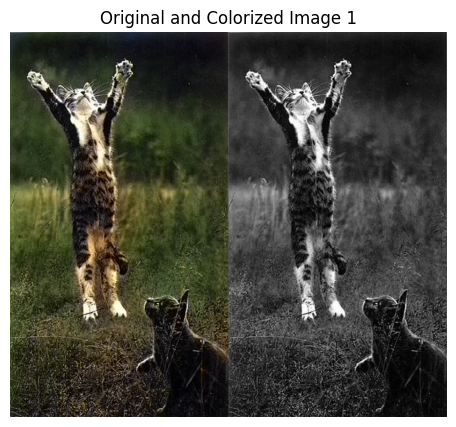

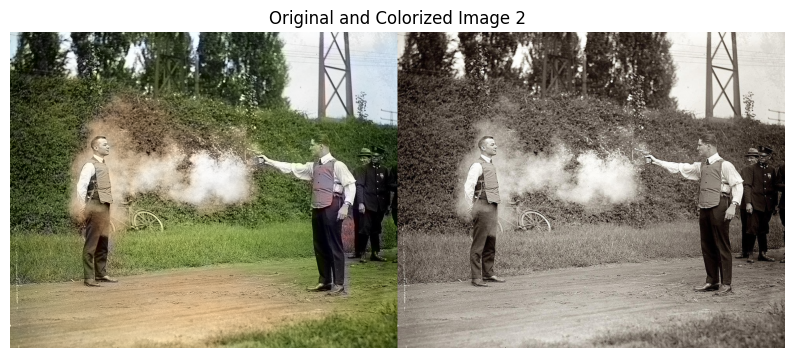

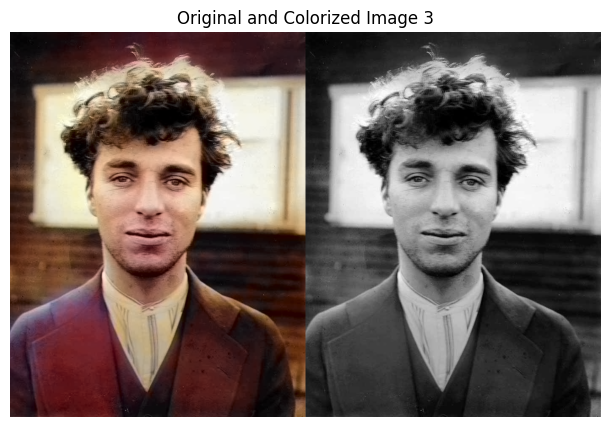

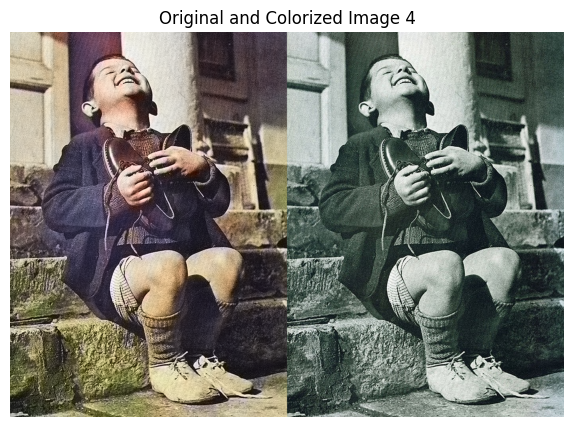

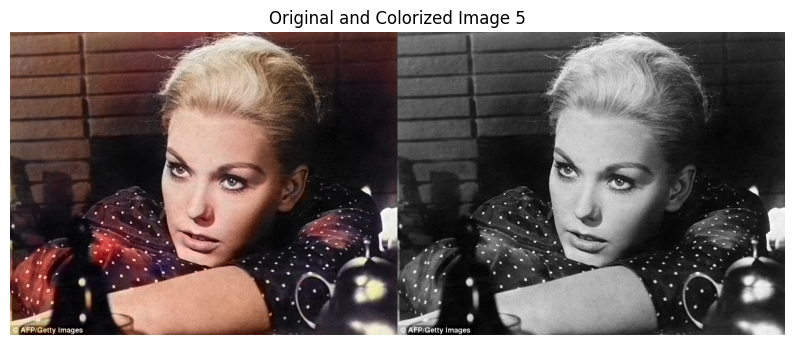

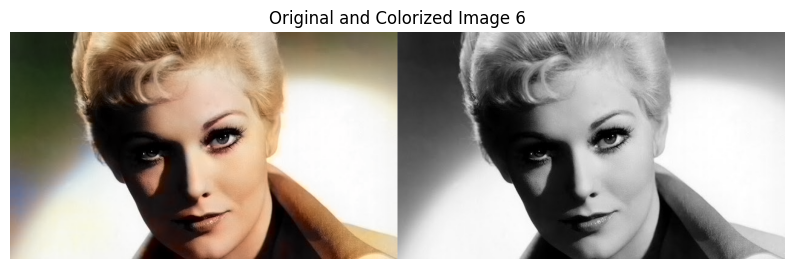

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to the model files
prototxt_path = '/content/drive/MyDrive/Colab Notebooks/Colorize-photos-main/colorization_deploy_v2.prototxt'
caffemodel_path = '/content/drive/MyDrive/Colab Notebooks/Colorize-photos-main/colorization_release_v2.caffemodel'
npy_path = '/content/drive/MyDrive/Colab Notebooks/Colorize-photos-main/pts_in_hull.npy'

# Load the model
model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)
c_points = np.load(npy_path)
c_points = c_points.T.reshape(2, 313, 1, 1).astype('float32')
model.getLayer(model.getLayerId('class8_ab')).blobs = [c_points]
model.getLayer(model.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, dtype='float32')]

for i in range(1, 7):
    img_path = f'/content/drive/MyDrive/Colab Notebooks/Colorize-photos-main/a{i}.jpg'
    img = cv2.imread(img_path)
    if img is None:
        print(f"Image {img_path} not found.")
        continue
    img_scale = img.astype('float32') / 255
    img_lab = cv2.cvtColor(img_scale, cv2.COLOR_BGR2LAB)
    L = img_lab[:, :, 0]
    model.setInput(cv2.dnn.blobFromImage(L, mean=50, size=(224, 224)))
    ab = model.forward()
    c = np.moveaxis(ab.squeeze(), [0], [2])
    ab_resized = cv2.resize(c, (img.shape[1], img.shape[0]))
    colored_lab = cv2.merge([L, ab_resized])
    colored_bgr = cv2.cvtColor(colored_lab, cv2.COLOR_LAB2BGR)
    colored_bgr = np.clip(colored_bgr, 0, 1)
    colored_bgr = (255 * colored_bgr).astype('uint8')
    stack = np.hstack((colored_bgr, img))

    # Display the image using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(stack, cv2.COLOR_BGR2RGB))
    plt.title(f'Original and Colorized Image {i}')
    plt.axis('off')
    plt.show()


Saving a5.jpg to a5.jpg


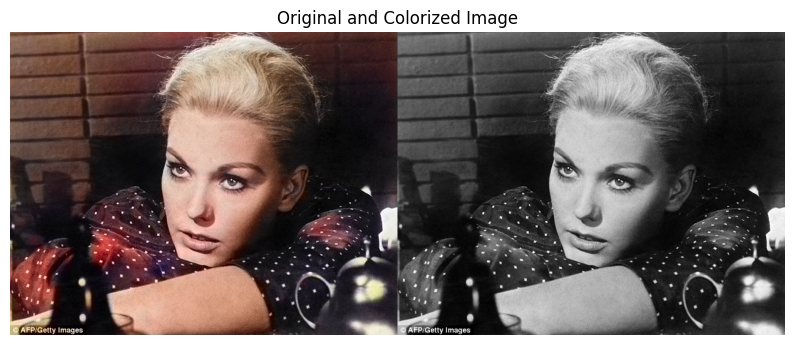

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image

# Function to colorize image
def colorize_image(image_path):
    # Paths to the model files
    prototxt_path = '/content/drive/MyDrive/Colab Notebooks/Colorize-photos-main/colorization_deploy_v2.prototxt'
    caffemodel_path = '/content/drive/MyDrive/Colab Notebooks/Colorize-photos-main/colorization_release_v2.caffemodel'
    npy_path = '/content/drive/MyDrive/Colab Notebooks/Colorize-photos-main/pts_in_hull.npy'

    # Load the model
    model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)
    c_points = np.load(npy_path)
    c_points = c_points.T.reshape(2, 313, 1, 1).astype('float32')
    model.getLayer(model.getLayerId('class8_ab')).blobs = [c_points]
    model.getLayer(model.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, dtype='float32')]

    img = cv2.imread(image_path)
    if img is None:
        print(f"Image {image_path} not found.")
        return
    img_scale = img.astype('float32') / 255
    img_lab = cv2.cvtColor(img_scale, cv2.COLOR_BGR2LAB)
    L = img_lab[:, :, 0]
    model.setInput(cv2.dnn.blobFromImage(L, mean=50, size=(224, 224)))
    ab = model.forward()
    c = np.moveaxis(ab.squeeze(), [0], [2])
    ab_resized = cv2.resize(c, (img.shape[1], img.shape[0]))
    colored_lab = cv2.merge([L, ab_resized])
    colored_bgr = cv2.cvtColor(colored_lab, cv2.COLOR_LAB2BGR)
    colored_bgr = np.clip(colored_bgr, 0, 1)
    colored_bgr = (255 * colored_bgr).astype('uint8')
    stack = np.hstack((colored_bgr, img))

    # Display the image using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(stack, cv2.COLOR_BGR2RGB))
    plt.title(f'Original and Colorized Image')
    plt.axis('off')
    plt.show()

# Upload the image
uploaded = files.upload()

# Process each uploaded image
for file_name in uploaded.keys():
    file_path = f"/content/{file_name}"
    with open(file_path, 'wb') as f:
        f.write(uploaded[file_name])
    colorize_image(file_path)
